<a href="https://colab.research.google.com/github/monalinayak/grip_TASK-1/blob/main/grip_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation**

**Data Science and Bussiness Analytics**

**Task-2 Prediction using Unsupervised ML**

**Name- Monali Nayak**

**Importing the Dependencies**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [38]:
df=pd.read_csv('/content/sample_data/Iris.csv')

**Exploring Data**

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.shape

(150, 6)

In [41]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Hence, There are no null values.**

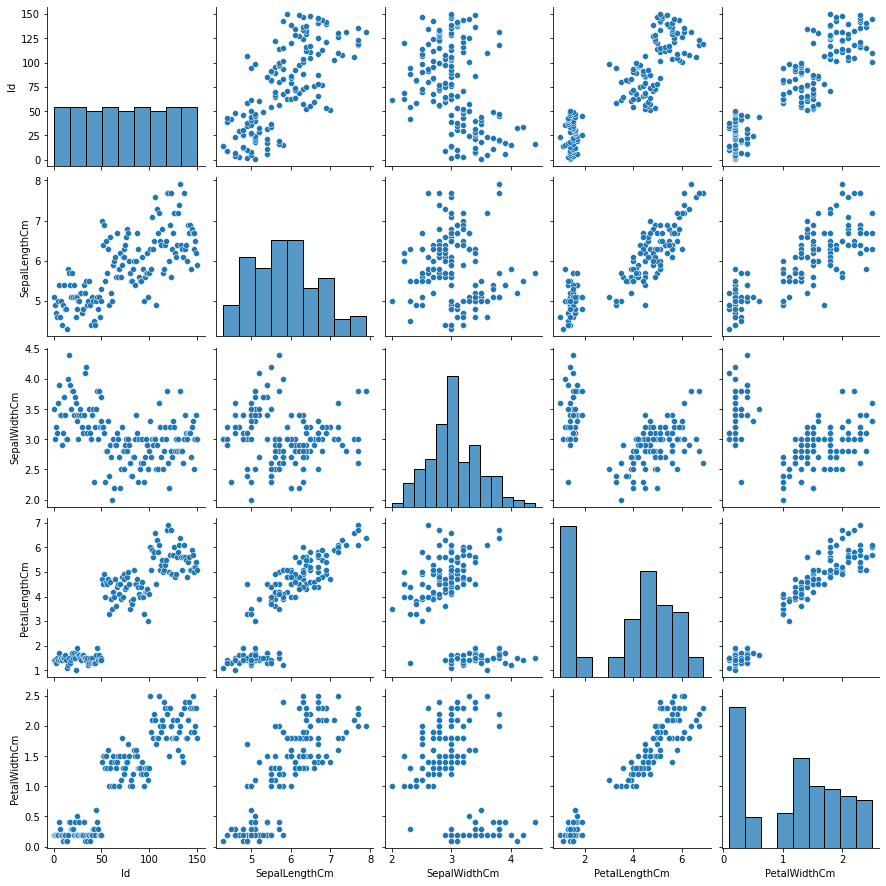

In [44]:
sns.pairplot(df)

**### Using Elbow Method to find the Optimal Number of Clusters**

**Data Preparation**

In [45]:
x=df.iloc[:,1:5].values

In [46]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

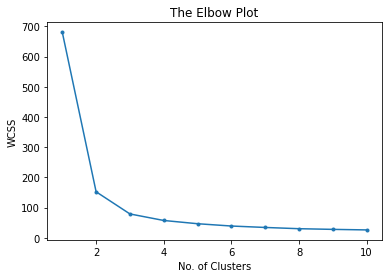

In [47]:
#plotting the elbow plot
plt.plot(range(1,11),wcss,marker=".")
plt.title('The Elbow Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

**We can conclude(from the elbow plot) that the optimal no. of clusters =3**

In [48]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
#return a label per data point based on the cluster
Y=kmeans.fit_predict(x)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**Visualizing the Clusters**

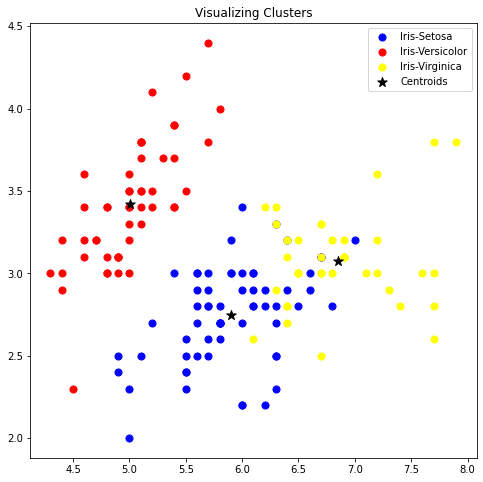

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1],s=50,c='blue',label='Iris-Setosa')
plt.scatter(x[Y==1,0],x[Y==1,1],s=50,c='red',label='Iris-Versicolor')
plt.scatter(x[Y==2,0],x[Y==2,1],s=50,c='yellow',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label="Centroids",marker='*')
plt.title("Visualizing Clusters")
plt.legend()
plt.show()

**CONCLUSION**
1. On applying the elbow method, the optimum no of clusters obtained is 3.
2. A scatter graph has been ploted for the visualization of each clusters and the centroids of each cluster is represented by a star.